# Protein conformation - Ramachandran Principle

The purpose of this notebook is to study the famous angle distribution of two bonds of the main chain of proteins, respectively called phi and psi. 
This notebook will illustrate the Ramachandran Principle: *The Ramachandran Principle says that alpha helices, beta strands, and turns are the most likely conformations for a polypeptide chain to adopt, because most other conformations are impossible due to steric collisions between atoms.*

The methods used will be clustering.

Source: https://proteopedia.org/wiki/index.php/Tutorial:Ramachandran_principle_and_phi_psi_angles

## 1.

Before actually plotting the data, we need to import the needed libraries and the import the data from the given csv file. The dataframe is analysed before going further.

In [ ]:
# Importation of the different libraries we will need
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Creation of the database, 
df = pd.read_csv("datasets/assignment3-data.csv")

We first check the different properties and features of our data to understand our dataset.

In [ ]:
# Understanding the features (columns) of the dataframe
df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


Now we can also take a look at the shape of the dataframe to better understand how much data we have to work with.

In [ ]:
# Shape of the dataframe
df.shape

(29369, 5)

We can also check if the dataframe has some missing data (**NaN**).

In [ ]:
# Check of the quality of the data
df.isna().sum()

residue name    0
position        0
chain           0
phi             0
psi             0
dtype: int64

So, the dataframe has a fair amount of data (about 30k data points) and is clean.

Before studying any correlations, it is wise to first check if the column *position* is not just an incremental number and actually represents something. We can easily do this by plotting and histogram and looking if the different positions have the same frequency (count).

<AxesSubplot:xlabel='position', ylabel='Count'>

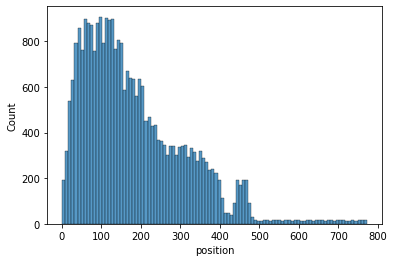

In [ ]:
# Plotting a histogram
sns.histplot(df['position'], bins=100)

Now that we know that position is a feature and not only an incremental number, we can plot a correlation map to see if our data are linearly correlated.

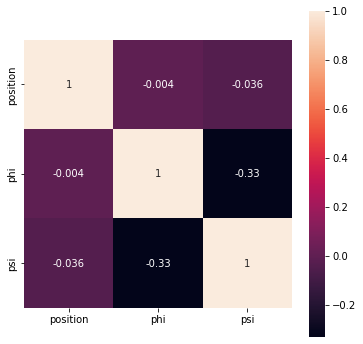

In [ ]:
# Creating the figure
plt.figure(figsize = (6,6))

# Plotting the correlation map as a heat map
sns.heatmap(
    df.corr(),
    annot=True,
    square=True)

# Showig the plot
plt.show()

As we can see, the correlation coefficients do **not show** any clear correlation. 

To further analyze if there is any correlation, we can also draw a *pairplot*.

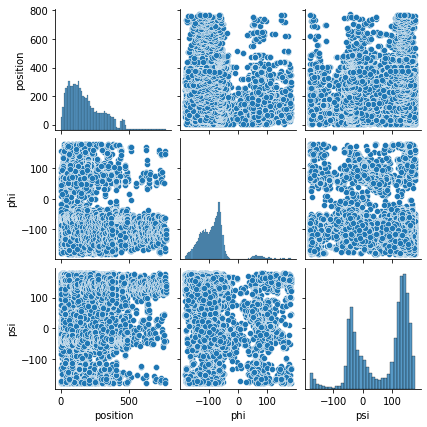

In [ ]:
# Plotting the pairplot
sns.pairplot(
    df,
    height=2,
    aspect=1)

# Showig the plot
plt.show()

As expected, this complex problem does not have a clear linear correlation on the different variables of the dataframe. This means we cannot use tools such as linear regression.

Let's start with the clustering.

### a.

Firstly, we are going to plot a **scatterplot**. To avoid having a mess on the figure, the hue regarding different *chains* is not reported, as it would not give more information. This is because we have 19 chains, making it difficult for the eye to spot 19 colors. Furthermore, we already checked above that there is no correlation between *position* and both phi or psi so that we do not need to plot this feature in the scatterplot.

Firstly, we set the style of the plots.

In [ ]:
# Setting the style for the plots
sns.set_style('whitegrid')

Now we can draw a scatterplot of phi vs psi.

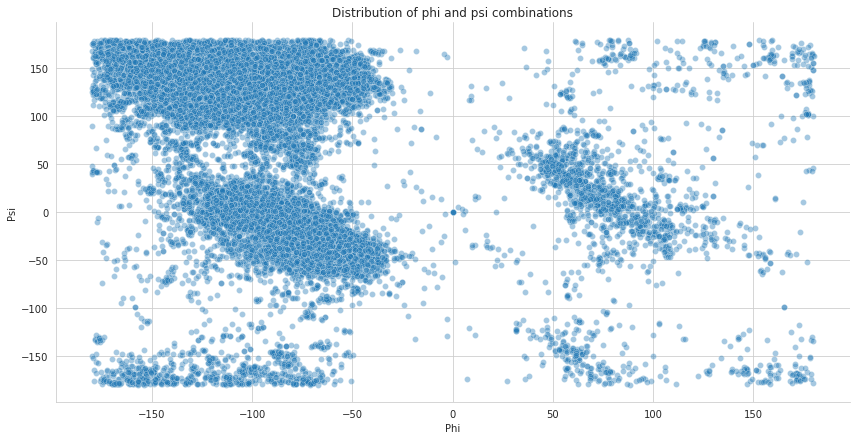

In [ ]:
# Plotting the scatterplot without hue and size as it would make the chart non-readable
g = sns.relplot(
    data=df, 
    x='phi', 
    y='psi',  
    alpha=0.4,
    height=6, 
    aspect=2).set( 
        title="Distribution of phi and psi combinations")

# Giving labels to the axis
g.set_xlabels("Phi")
g.set_ylabels("Psi")

At first glance, it seems there are around 5-6 clusters with different densities. These data seem to be a bit noisy as we can see some points alone scattered around the whole chart.

### b.

Next, we are going to plot a **heatmap**. As the heatmap would require 3-dimensional data but we only have 2-dimensional data (*phi* and *psi*), using a 2-D histogram allows to plot something similar to a heatmap, where the color intensity (heat) is represented by the density of data.


<AxesSubplot:xlabel='phi', ylabel='psi'>

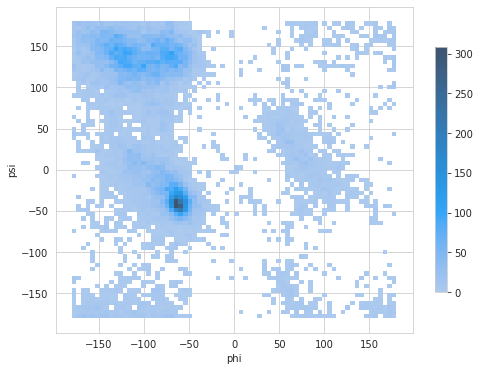

In [ ]:
# Plotting the heatmap as a 2-variables histogram

# Creating figure
plt.figure(figsize=(8,6))

# Plotting the heatmap
sns.histplot(
    x=df['phi'], 
    y=df['psi'], 
    bins=70,
    cbar=True, 
    cbar_kws=dict(shrink=.75))

The same takeaway can be taken from this study on the number of clusters and densities. Nevertheless, this heatmap allow us to see that indeed some clusters in the bottom-right corner upper-right corner are probably noise. This would reduce the number of clusters to about 3-4.

## 2.

The purpose of this section is to set the K-means method in a proper way on our dataset.

Firstly, we are going to import the needed libraries.

In [ ]:
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

### a. &amp; b.

First, the data are prepared to work easily with the *phi* and *psi* values.

In [ ]:
# Creating the needed arrays
phi = np.array(df['phi'])
psi = np.array(df['psi'])
X = np.transpose(np.array([phi, psi]))

Then, K-means method will be computed for 9 different values of *K* and compared thanks to the **silhouette** metric to find the most suitable one.

It has to be noted that *k=1* is not being shown as it is trivial, so the first plot is with *k=2*

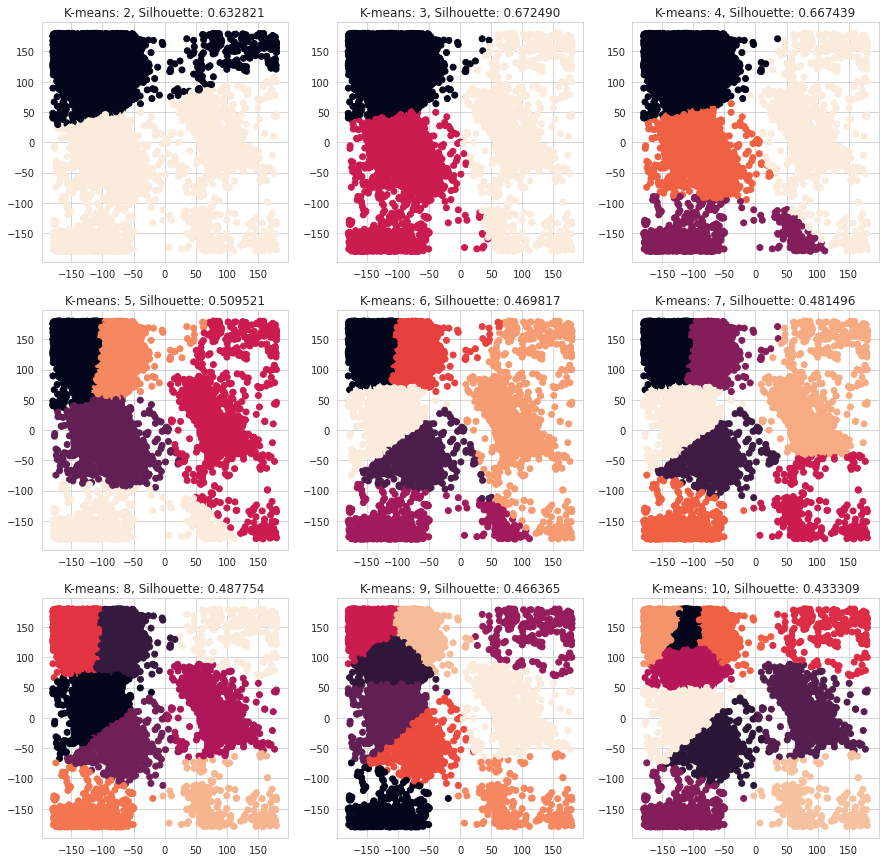

In [ ]:
# Choosing the last number of k-clusters
max_n_cluster_chosen = 10

# Creation of the figure containing the 9 subplots
plt.figure(figsize=(15, 15))

# Counter needed to plot the subplots as 331, 332, 333 etc.
counter = 329

# Loop to generate the dataframe with all the cluster centers for different kmeans
for n_cluster_chosen in range(2,max_n_cluster_chosen+1):
    # Perform K-Means clustering by specifying the number of clusters and fit the data X
    kmeans = KMeans(n_clusters=n_cluster_chosen, random_state=0).fit_predict(X)

    # At the same time, we also evaluate the clusters by calculating the silhouette score
    kmeans_model = KMeans(n_clusters=n_cluster_chosen, random_state=0).fit(X)
    labels = kmeans_model.labels_
    silhouette = metrics.silhouette_score(X, labels, metric='euclidean')

    # Plotting the subplots. Counter is 329 + 2,3,4...
    plt.subplot(counter + n_cluster_chosen)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans)
    plt.title("K-means: %i, Silhouette: %f" %(n_cluster_chosen, silhouette))

As seen from above, probably the best value of **k** is **3**. This reflects the idea we had by seeing the first scatterplot, where we can see about 4 big blobs: 3 around -100 phi, 1 around 100 phi. It has to be noted that being the axis two angles, the data at -180 and 180 should be clustered toghether. This is a limit of the representation in the x-y plane. Nevertheless, the plot with K-means = 4 still misgrouped the data at the bottom of the chart. This is probably due to the data at the top and bottom right corner which is mostly noise or not very stable angles. Indeed, this is reflected by a slightly lower silhouette value of *k=4* with respect to *k=3*. Still, it is clearly visible that the central blob is different from the bottom one.

The **silhouette coefficient** helps us **validating** our clustering by analyzing the mean distance between a sample and all the other points in the same class and the mean distance between a sample and all other points in the next nearest cluster. In this way, it easy to spot when the clustering is valid (value close to 1) or not (value close to 0).

### c.

Not all the clusters found in part *(a)* are reasonable, as it is shown by the silhouette values. The best ones are *k=3* and *k=4*. It has to be noted that even though *k=2* has a relatively high silhouette, the clusters do not make much sense.

### d.

We can try shifting all the angles from (-180, 180) to (0, 360). This do not completely solves the problem as the data at 360 degress is the same as the one at 0 degrees. Nevertheless, this should allow us to better see how to properly cluster.

In [ ]:
# Creating the needed arrays by shifting the initial ones
phi_shift = phi % 360
psi_shift = psi % 360
X_shift = np.transpose(np.array([phi_shift, psi_shift]))
df_shifted = pd.DataFrame(X_shift)
df_shifted.columns = ['phi', 'psi']


We can now draw a scatterplot to get a look at how the shifted data look like.

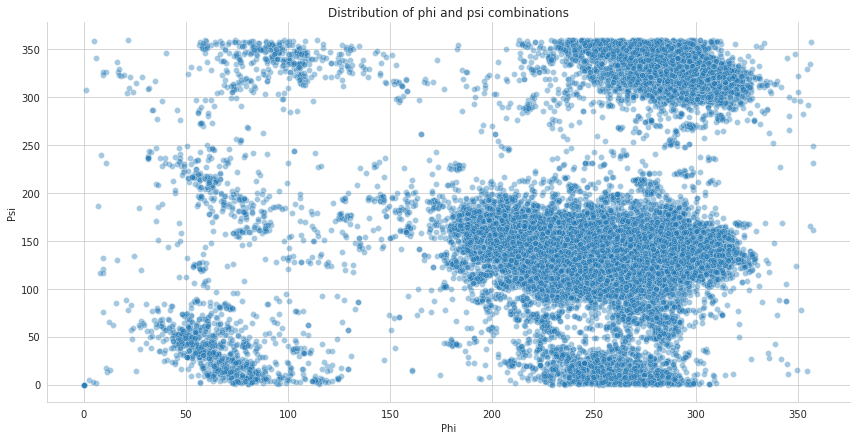

In [ ]:
# Plotting the scatterplot without hue and size as it would make the chart non-readable
g = sns.relplot(
    data=df_shifted, 
    x='phi', 
    y='psi',  
    alpha=0.4,
    height=6, 
    aspect=2).set( 
        title="Distribution of phi and psi combinations")

# Giving labels to the axis
g.set_xlabels("Phi")
g.set_ylabels("Psi")

As before, K-means method will be computed for 9 different values of *K* and compared thanks to the **silhouette** metric to find the most suitable one.

It has to be noted that *k=1* is not being shown as it is trivial, so the first plot is with *k=2*

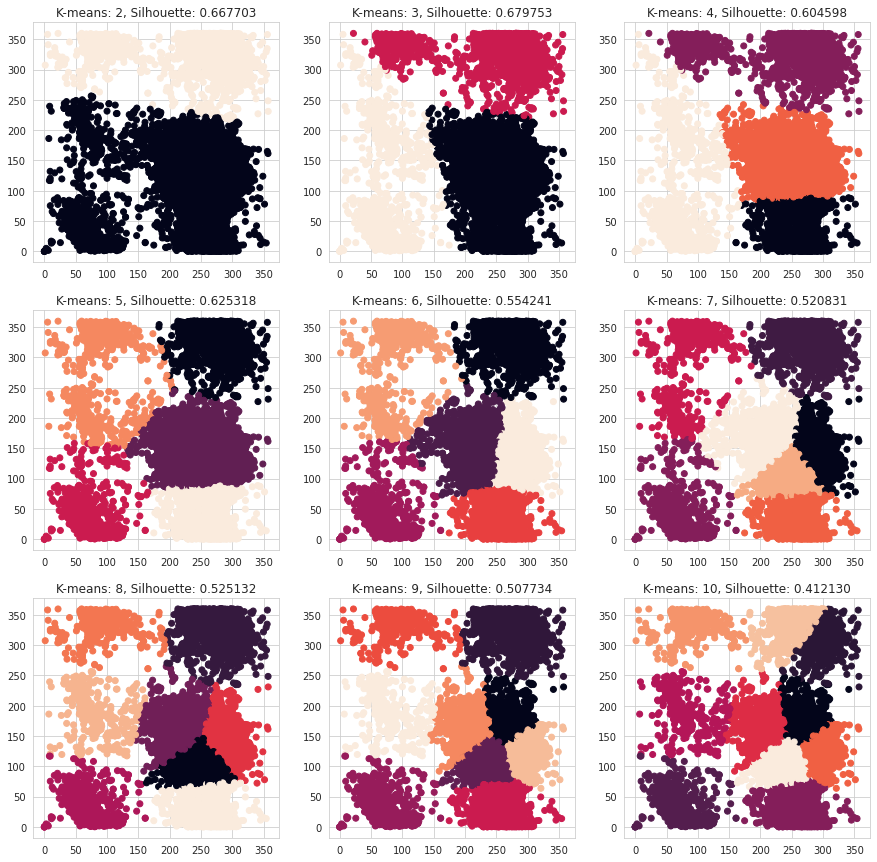

In [ ]:
# Choosing how many cluster centers to fit
max_n_cluster_chosen = 10

# Creation of the figure containing the 9 subplots
plt.figure(figsize=(15, 15))

# Counter needed to plot the subplots as 331, 332, 333 etc.
counter = 329

# Loop to generate the dataframe with all the cluster centers for different kmeans
for n_cluster_chosen in range(2,max_n_cluster_chosen+1):
    # Perform K-Means clustering by specifying the number of clusters and fit the data X
    kmeans = KMeans(n_clusters=n_cluster_chosen, random_state=0).fit_predict(X_shift)

    # At the same time, we also evaluate the clusters by calculating the silhouette score
    kmeans_model = KMeans(n_clusters=n_cluster_chosen, random_state=0).fit(X_shift)
    labels = kmeans_model.labels_
    silhouette = metrics.silhouette_score(X_shift, labels, metric='euclidean')

    # Plotting the subplots. Counter is 330 + 2,3,4...
    plt.subplot(counter + n_cluster_chosen)
    plt.scatter(X_shift[:, 0], X_shift[:, 1], c=kmeans)
    plt.title("K-means: %i, Silhouette: %f" %(n_cluster_chosen, silhouette))

The results show a slightly better silhouette for *k=2* and *k=3*, while worse values for higher *k*. This probably confirms that the best choice of k is 3. Nevertheless, is it still clear we are missing some clustering here, and maybe the *DBSCAN* method will help us improve.

**NOTE**: we recognized that the distance metric used is not right as the distance between the borders is 0 since the axis are periodic. For this reason, it would be needed to implement a new metric distance where the edges have no distance. Unfortunately, this was difficult to report here due to computational issues (the distance matrix is 30000x30000, requiring too much memory).

## 3.

The purpose of this section is to try setting a proper **DBSCAN** method on a database.

To use the **DBSCAN** method we first need to import the needed libraries

In [ ]:
# Importing libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### a.

The purpose of this section is to determine in a proper way the two hyperparameters of the the DBSCAN method: **minimum number of points to find the cores** and **maximum distance between two points of the same neighboorhood**.

Firstly, some initial values will be tried to have a glimpse of how the data is being clustered.

Then, a range of these two parameters will be computed and compared to each other by evaluating the *number of clusters*, the *number of noise points* and the *mean noise point distance metrics* with the *knn-method* (k=6 was chosen).

Finding proper values totally determine the quality of clustering for different reasons: overestimating the value of **epsilon** might uncorrectely erase noise, but a low one will prevent having some significative clusters. Furthermore, a low **minimum points** value will create clusters where it should not while a high one will reduce the size of clusters and increase noise.

Firstly, we need to standardize the data in order to correctly use the DBSCAN method.

In [ ]:
# Standardizing the data
X_std = StandardScaler().fit_transform(X)

Now we can use the DBSCAN method. The first chosen parameters are *eps=0.3* and *min_samples=100*. This will allow us to have a glance at how our data is being clustered.

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=100).fit(X_std)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Printing information on the clustering 
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 752


We can now plot the results, marking noise with black color. Big size dots represent core points while small ones represent border points.

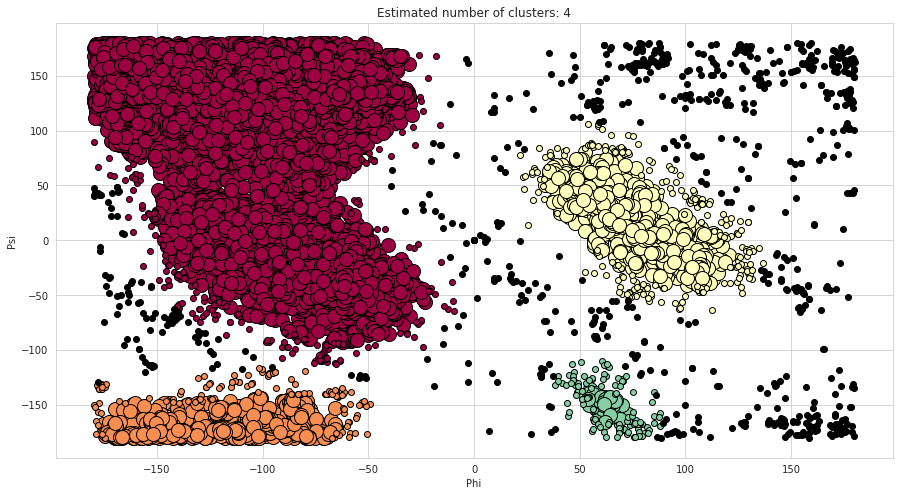

In [ ]:
# Plot results
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

# Create figure
plt.figure(figsize=(15,8))

# Looping though k and colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

This first result seeems nice, but we can do better: we can try to automate the process to find what can be the best values of *eps* and *distance*.

Firstly, we import the needed libraries.

**NOTE**: as before, we recognized that the distance metric used is not right as the distance between the borders is 0 since the axis are periodic. For this reason, it would be needed to implement a new metric distance where the edges have no distance. Unfortunately, this was difficult to report here due to computational issues (the distance matrix is 30000x30000, requiring too much memory).

In [ ]:
# Importing libraries
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

Now we create the dataframe using the standardized data.

In [ ]:
# Creating scaled dataframe
df_scaled = pd.DataFrame(X_std)
df_scaled.columns = ['phi','psi']


Let's check if the data is in fact standardized.

In [ ]:
df_scaled.head()

,phi,psi
0,-1.177721,0.860485
1,0.669849,0.787441
2,-0.661598,-2.556653
3,-0.931524,0.799968
4,-0.395603,0.347643


The data is clean and properly standardized.

We can set the range of the two parameters we want to try.

In [ ]:
# Setting which eps and min_samples to test
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 0.8, 0.1)]
min_samples_to_test = range(5, 90, 10)

# Printing what we are going to test
print("EPS to test:", eps_to_test)
print("MIN_SAMPLES to test:", list(min_samples_to_test))

EPS to test: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
MIN_SAMPLES to test: [5, 15, 25, 35, 45, 55, 65, 75, 85]


Then, we create a function to evaluate our 3 metric to choose our hyperparameters: the *number of clusters*, the *number of noise points* and the *mean noise point distance metrics*

In [ ]:
# Defining function to iterate though all the eps and min_samples
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1

    # Counting how many noise points we have
    noise_counter = sum(noise_indices)
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s       %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters, noise_counter))
    
    # Returning the data
    return(noise_mean_distance, number_of_clusters, noise_counter)
    

Then, we create dataframe to contain all the different values of the metrics.

In [ ]:
# Dataframe for the metric on mean distance of the noise points from the K closest points
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe for the metric on the number of clusters
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe for the metricon the number of noise points
results_noise_count = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

Let's first read the metrics while the code is running, and then visualise it with a heatmap.

In [ ]:
# Initializing iterations
iter_ = 0

# Printing head row
print("ITER| INFO%s |  DIST    CLUS    NOISE" % (" "*39))
print("-"*75)

# Looping through eps and min_samples
for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        # Increasing counter iteration
        iter_ += 1
        
        # Computing metrics
        noise_metric, cluster_metric, noise_count = get_metrics(eps, min_samples, df_scaled, iter_)
        
        # Inserting results in the dataframes
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_noise_count.loc[eps, min_samples] = noise_count

ITER| INFO                                        |  DIST    CLUS    NOISE
---------------------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.147   34        317
  2 | Tested with eps = 0.1 and min_samples =  15 | 0.091   20        940
  3 | Tested with eps = 0.1 and min_samples =  25 | 0.069    7       1719
  4 | Tested with eps = 0.1 and min_samples =  35 | 0.061    9       2210
  5 | Tested with eps = 0.1 and min_samples =  45 | 0.057    9       2612
  6 | Tested with eps = 0.1 and min_samples =  55 | 0.051    6       3200
  7 | Tested with eps = 0.1 and min_samples =  65 | 0.049    5       3563
  8 | Tested with eps = 0.1 and min_samples =  75 | 0.045    5       4119
  9 | Tested with eps = 0.1 and min_samples =  85 | 0.043    4       4582
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.253    7         34
 11 | Tested with eps = 0.2 and min_samples =  15 | 0.149    7        205
 12 | Tested with eps = 0.2 and min

Now we can plot the heatmap.

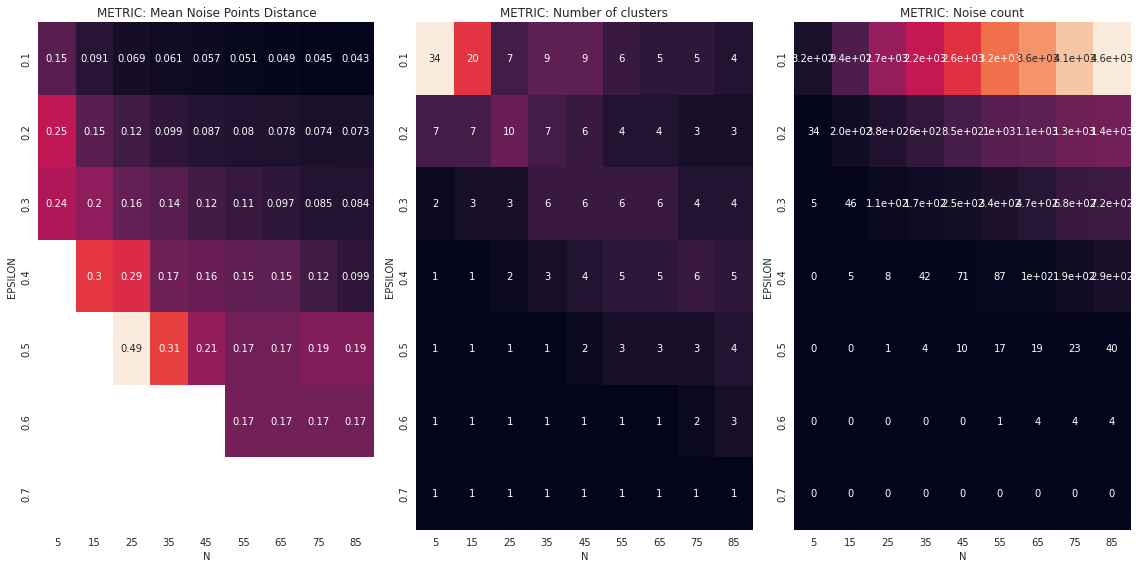

In [ ]:
# Creating figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8) )

# Plotting the 3 subplots
sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")
sns.heatmap(results_noise_count, annot = True, ax = ax3, cbar = False).set_title("METRIC: Noise count")

# Labeling subplots
ax1.set_xlabel("N"); ax2.set_xlabel("N"), ax3.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON"), ax3.set_ylabel("EPSILON")

# Plotting everything
plt.tight_layout(); plt.show()

Now that we have taken a look at some possible values for *eps* and *min_samples*, we can decide which combination is the best one. This is subjective and up to the data scientist. In our case, the chosen values were: **eps = 0.3** and **min_samples = 45**. This is a result of noticing that the model results become robust around these values regarding the three metrics. In fact, the idea is to try to maximize the *Mean Noise Point Distance* while having robust values for the *number of clusters* and *noise points* compared to other combinations. Indeed, around these values we can see we have 6 clusters, indicating that small variations in *eps* and *min_samples* should not change the number of clusters, while keeping the *mean noise points distance* high (the higher the better). Furthermore, the noise count is neither a high value (which indicates small clusterings) nor a low value (indicating clusters with noise inside).

### b.

With the chosen values, we can move on and finally plot a scatter plot representing the different clusters.

Clusters and outliers for this model will be highlighted and the amino acid residue types that are most frequently outliers will be revealed.

In [ ]:
# Istantiating with eps = 0.3 and min_samples = 45 (chosen values)
best_eps = 0.3
best_min_samples = 45
best_dbscan_model = DBSCAN( eps = best_eps, min_samples = best_min_samples)

# Fitting
best_dbscan_model.fit(df_scaled)

# Extracting labels
df_scaled["LABEL"] = best_dbscan_model.labels_
core_samples_mask = np.zeros_like(best_dbscan_model.labels_, dtype=bool)
core_samples_mask[best_dbscan_model.core_sample_indices_] = True


# Counting the outliers
n_clusters_best = len(df_scaled['LABEL'].unique())-1
n_outliers_best = df_scaled[df_scaled['LABEL']<0]['LABEL'].sum()*-1

# Printing information on the clustering
print('The number of clusters is:', n_clusters_best)
print('The total number of outliers is:', n_outliers_best)

The number of clusters is: 6
The total number of outliers is: 248


As seen in the heatmap, the metrics are consistent.

The clustering will now be plotted, in the same way as the first try: bigger dots for cores, and black dots for the noise.

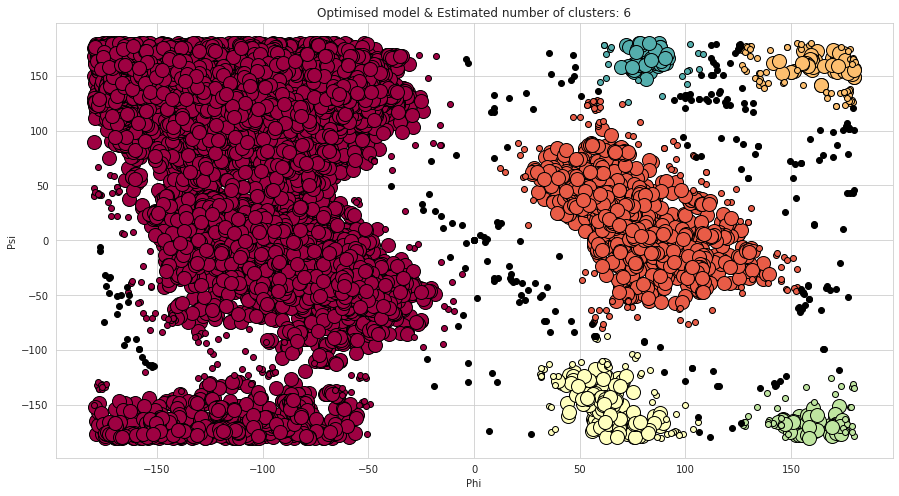

In [ ]:
# Plot results
# Black removed and is used for noise instead.
unique_labels_best = set(df_scaled["LABEL"])
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_best))]

# Create figure
plt.figure(figsize=(15,8))

# Looping though k and colors
for k, col in zip(unique_labels_best, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (df_scaled["LABEL"] == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('Optimised model & Estimated number of clusters: %d' % n_clusters_best)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

This clustering reflects quite well the *Ramachandran Principle* (http://bioinformatics.org/molvis/phipsi/). We can see that the big red cluster groups toghether the *alpha helix* (psi = +10 to -55) and the *beta strand* (psi = +90 to +180). This is because the data points almost overlap so it is difficult to separate the two groups. On the other hand, we can clearly see some clustering on the right. Furthermore, the condition where *clashes occur at phi = 0 for all psi angles* is respected as well.

In this scatterplot, 6 clusters are shown. We can see few outliers and clear clusters seem to be defined in this model.

Now we will have a look at the most frequently outliers amino acids by counting noise for each residue name.

Text(0, 0.5, 'Number')

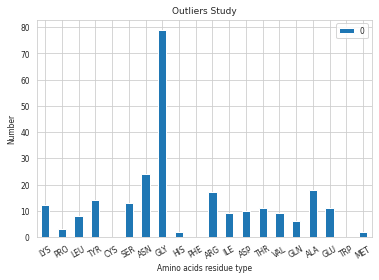

In [ ]:
#Bar plot with the outliers
# adding the residue name to the rescaled dataframe
df_scaled['residue name']=df['residue name']

#list of the names for the loop
all_residue_name=df_scaled['residue name'].unique()

#list that will contain the number of outliers per amino acid
value_outlier = []
for i in range(len(all_residue_name)):
  outliers = df_scaled[(df_scaled['residue name']==all_residue_name[i]) & (df_scaled['LABEL']<0)]
  outlier_number=len(outliers)
  value_outlier.append(outlier_number)

#Creation of a small dataframe to plot the bar chart
df_barplot=pd.DataFrame(value_outlier,all_residue_name)

#Plot
plt.rcParams.update({'font.size': 7.5})
df_barplot.plot.bar(rot=30)
plt.title("Outliers Study")
plt.xlabel("Amino acids residue type")
plt.ylabel("Number")


It can be seen that some amino acids are never outliers in this dataset, such as *CYS* or *PHE*, while some are the most common ones such as *ASN* and *GLY*.

### c.

The K-means and DBSCAN method are compared in this section.
The best model for each method is re-plotted here and compared.

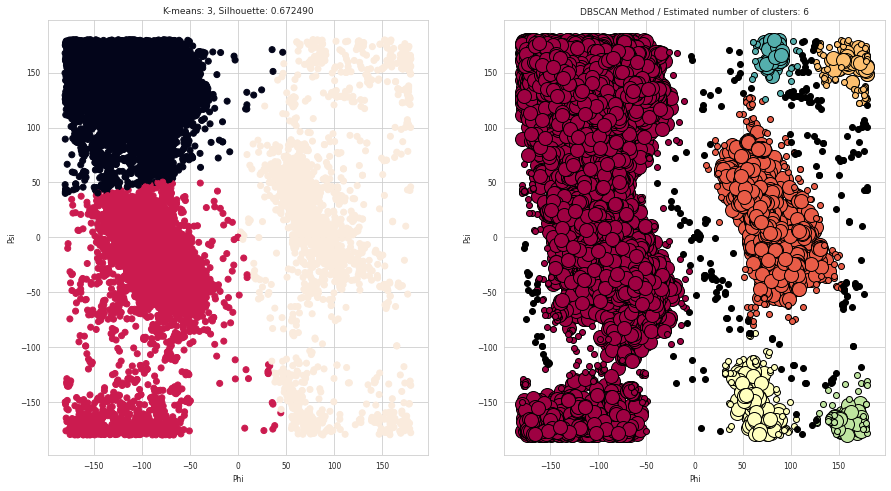

In [ ]:
plt.figure(figsize=(15, 8))


#K-means method 

# Choosing how many cluster centers to fit
n_cluster_chosen=3

#Perform K-Means clustering by specifying the number of clusters and fit the data X
kmeans = KMeans(n_clusters=n_cluster_chosen, random_state=0).fit_predict(X)

# At the same time, we also evaluate the clusters by calculating the silhouette score
kmeans_model = KMeans(n_clusters=n_cluster_chosen, random_state=0).fit(X)
labels_kmeans = kmeans_model.labels_
silhouette = metrics.silhouette_score(X, labels_kmeans, metric='euclidean')

# Plotting the subplot
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)
plt.title("K-means: %i, Silhouette: %f" %(n_cluster_chosen, silhouette))
plt.xlabel('Phi')
plt.ylabel('Psi')
    
#DBSCAN method
# Plot results
# Black removed and is used for noise instead.
unique_labels_best = set(df_scaled["LABEL"])
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_best))]

# Create figure
plt.subplot(122)
# Looping though k and colors
for k, col in zip(unique_labels_best, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (df_scaled["LABEL"] == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('DBSCAN Method / Estimated number of clusters: %d' % n_clusters_best)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

As expected, K-means assigned all the values to a cluster while DBSCAN treated outliers as outliers. K-means is influenced by the shape of the clusers, which in our case are not necessarily spherical. Moreover, the number of clusters are different since the two validation studies lead us to set hyperparameters giving different number of clusters. 

According to us, the DB-scan did a better job at clustering, while requiring more computational power and effort to find the optimal hyperparameters. On the other hand, the K-means allow for an automatic algorithm to find the best silhouette value. Nevertheless, the capability of DBSCAN to treat outliers as outliers and cluster any shape greatly increases its performance.

### d.

From the chosen value of the hyperparameters (**eps = 0.3** and **min_samples = 45**), our model is already robust and not changing. This is a result of noticing that the model results become robust around these values regarding the three metrics. In fact, the idea is to try to maximize the *Mean Noise Point Distance* while having robust values for the *number of clusters* and *noise points* compared to other combinations. Indeed, around these values we can see we have 6 clusters, indicating that small variations in *eps* and *min_samples* should not change the number of clusters, while keeping the *mean noise points distance* high (the higher the better). 

This matter has already been discussed in section 3a, using a heatmap as reference. 

## 4.

The purpose of this section is to study a specific subset of data to see how the clustering can differ from the whole dataset.

### a.

The focus of the study will first be on the subset of the PRO-type amino acids.

Let's first check, clean and visualise the subdata, same way as the main dataset.

In [ ]:
#Creation of the subset
df_PRO=pd.DataFrame(df[df['residue name']=='PRO'])

We can now check how the data looks.

In [ ]:
#Check of the data
df_PRO.head()

,residue name,position,chain,phi,psi
1,PRO,11,A,-44.283210,136.002076
17,PRO,27,A,-49.944645,-25.888991
68,PRO,79,A,-76.452014,97.745207
110,PRO,121,A,-53.054020,-27.254912
123,PRO,134,A,-66.751364,94.099782


All our dataframe has the residue name *PRO*. Nice.

Now we create the same arrays as before, but just for the PRO residue name.

In [ ]:
# Creating the needed arrays
phi_PRO = np.array(df_PRO['phi'])
psi_PRO = np.array(df_PRO['psi'])
X_PRO = np.transpose(np.array([phi_PRO, psi_PRO]))

As before, we need to standardize the data in order to use the DBSCAN method.

In [ ]:
#Standardizing the data
X_std_PRO = StandardScaler().fit_transform(X_PRO)

We also need to create a standardized dataframe.

In [ ]:
#Rescale the dataframe
df_PRO_scaled=pd.DataFrame(X_std_PRO)
df_PRO_scaled.columns = ['phi','psi']

We can now plot the scatterplot only for the *PRO* residual name.

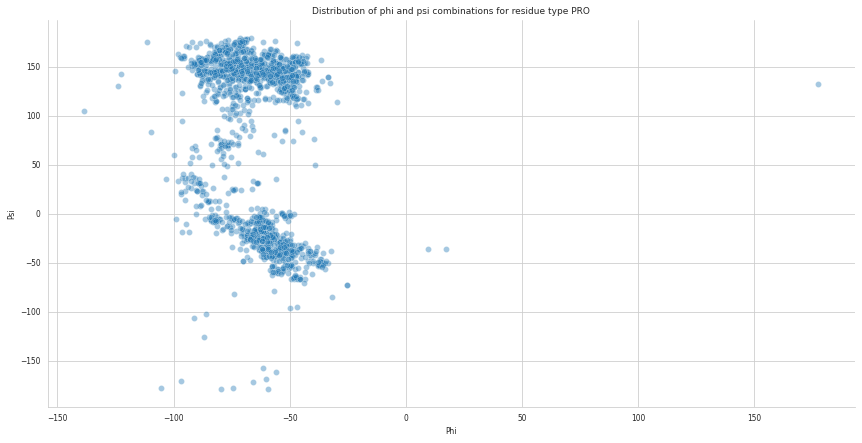

In [ ]:
# Plotting the scatterplot without hue and size as it would make the chart non-readable
g = sns.relplot(
    data=df_PRO, 
    x='phi', 
    y='psi',  
    alpha=0.4,
    height=6, 
    aspect=2).set( 
        title="Distribution of phi and psi combinations for residue type PRO")

# Giving labels to the axis
g.set_xlabels("Phi")
g.set_ylabels("Psi")

It can be seen that the amino acid PRO mainly lies in the left quadrant, in the biggest cluster of our first clustering. 

Now, the best hyperparameters for the clustering of residue type PRO will be determined in the same way as previously by computing the three different metrics.

In [ ]:
# Initializing iterations
iter_ = 0

# Printing head row
print("ITER| INFO%s |  DIST    CLUS    NOISE" % (" "*39))
print("-"*75)

# Looping through eps and min_samples
for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        # Increasing counter iteration
        iter_ += 1
        
        # Computing metrics
        noise_metric, cluster_metric, noise_count = get_metrics(eps, min_samples, df_PRO_scaled[['phi','psi']], iter_)
        
        # Inserting results in the dataframes
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_noise_count.loc[eps, min_samples] = noise_count

ITER| INFO                                        |  DIST    CLUS    NOISE
---------------------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.325   11        172
  2 | Tested with eps = 0.1 and min_samples =  15 | 0.158    3        481
  3 | Tested with eps = 0.1 and min_samples =  25 | 0.106    8        878
  4 | Tested with eps = 0.1 and min_samples =  35 | 0.078    2       1427
  5 | Tested with eps = 0.1 and min_samples =  45 | 0.073    0       1596
  6 | Tested with eps = 0.1 and min_samples =  55 | 0.073    0       1596
  7 | Tested with eps = 0.1 and min_samples =  65 | 0.073    0       1596
  8 | Tested with eps = 0.1 and min_samples =  75 | 0.073    0       1596
  9 | Tested with eps = 0.1 and min_samples =  85 | 0.073    0       1596
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.781    4         51
 11 | Tested with eps = 0.2 and min_samples =  15 | 0.463    4        101
 12 | Tested with eps = 0.2 and min

We can now evaluate the hyperparameters as before through a heatmap.

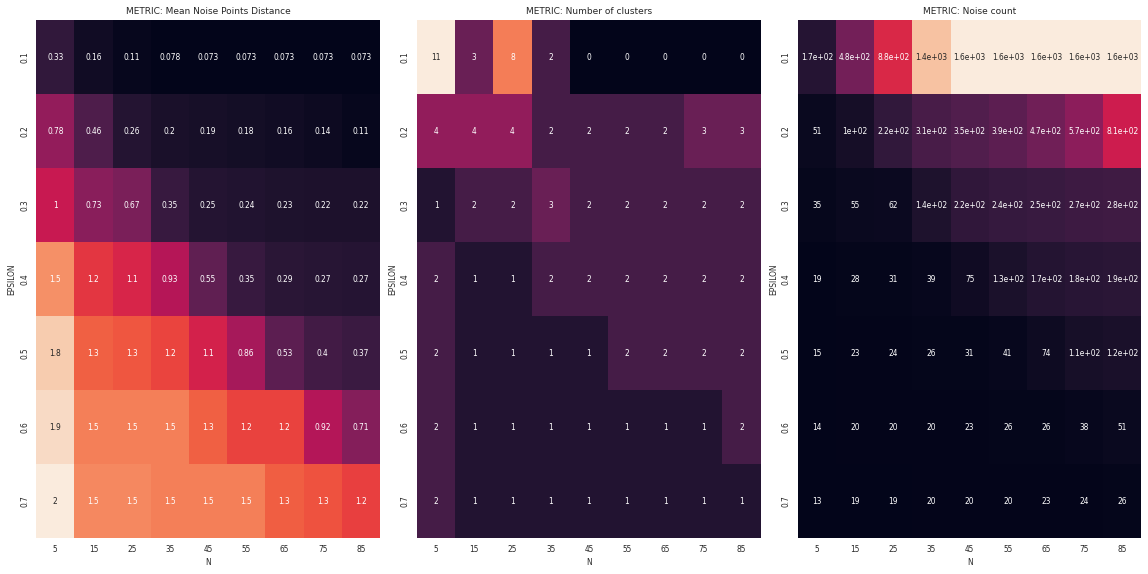

In [ ]:
# Creating figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8) )

# Plotting the 3 subplots
sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")
sns.heatmap(results_noise_count, annot = True, ax = ax3, cbar = False).set_title("METRIC: Noise count")

# Labeling subplots
ax1.set_xlabel("N"); ax2.set_xlabel("N"), ax3.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON"), ax3.set_ylabel("EPSILON")

# Plotting everything
plt.tight_layout(); plt.show()

For similar reasons as the previous study, **eps=0.4** and **minPts=35** have been chosen since the 3 metrics are robust in this area. Moreover, a number of clusters of 2 feel reasonable when looking at the scatterplot of the subset.

In the following blocks, this DBSCAN model will be computed and then plotted, to be compared to the mixed residue type model.

In [ ]:
# Istantiating with eps = 0.4 and min_samples = 35 
eps_PRO = 0.4
min_samples_PRO = 35
dbscan_model_PRO = DBSCAN( eps = eps_PRO, min_samples = min_samples_PRO)

# Fitting
dbscan_model_PRO.fit(df_PRO_scaled[['phi','psi']])

# Extracting labels
df_PRO["LABEL"] = dbscan_model_PRO.labels_
core_samples_mask_PRO = np.zeros_like(dbscan_model_PRO.labels_, dtype=bool)
core_samples_mask_PRO[dbscan_model_PRO.core_sample_indices_] = True

# Counting the outliers
n_clusters_PRO = len(df_PRO['LABEL'].unique())-1
n_outliers_PRO = df_PRO[df_PRO['LABEL']<0]['LABEL'].sum()*-1
print('The number of clusters is:', n_clusters_PRO)
print('The total number of outliers is:', n_outliers_PRO)

The number of clusters is: 2
The total number of outliers is: 39


We can now compare the clustering for the *PRO* residue name with the clustering done with all the dataset before, but only plotting the *PRO* residue name.

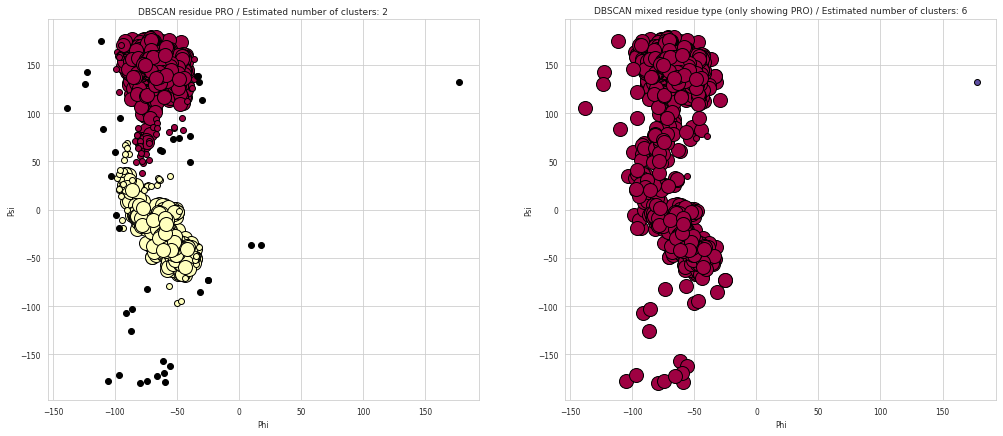

In [ ]:
# Plot results & compare to the original clustering
plt.figure(figsize=(17,7))

# Black removed and is used for noise instead.
unique_labels_PRO = set(df_PRO["LABEL"])
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_PRO))]

# Create figure
plt.subplot(121)
# Looping though k and colors
for k, col in zip(unique_labels_PRO, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (df_PRO["LABEL"] == k)
    xy = X_PRO[class_member_mask & core_samples_mask_PRO]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_PRO[class_member_mask & ~core_samples_mask_PRO]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('DBSCAN residue PRO / Estimated number of clusters: %d' % n_clusters_PRO)
plt.xlabel('Phi')
plt.ylabel('Psi')

plt.subplot(122)
# Looping though k and colors
for k, col in zip(unique_labels_best, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask1 = (df_scaled["LABEL"] == k) 
    class_member_mask2 = (df_scaled["residue name"]=='PRO')

    class_member_mask = class_member_mask1 & class_member_mask2
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('DBSCAN mixed residue type (only showing PRO) / Estimated number of clusters: %d' % n_clusters_best)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()



What is mainly differing is the number of clusters and the noise. As expected, when only the PRO amino acid are treated, more clusters are computed by the algorithm and the noise is lower. This is because we have less data to cluster, meaning it is easier to differentiate between noise and clusters.

### b.

The same method will be used here for the GLY amino acid.

In [ ]:
#Creation of the subset
df_GLY=pd.DataFrame(df[df['residue name']=='GLY'])

Checking if the data is correct.

In [ ]:
#Check of the data
df_GLY.head()

,residue name,position,chain,phi,psi
9,GLY,19,A,93.478288,-26.252796
10,GLY,20,A,65.608117,55.368614
19,GLY,29,A,72.426939,7.659478
23,GLY,33,A,-140.433679,159.800231
42,GLY,52,A,-122.469112,-4.890135


Creating the array with psi and phi.

In [ ]:
# Creating the needed arrays
phi_GLY = np.array(df_GLY['phi'])
psi_GLY = np.array(df_GLY['psi'])
X_GLY = np.transpose(np.array([phi_GLY, psi_GLY]))

Now we standardize the data for the DBSCAN.

In [ ]:
#Standardizing the data
X_std_GLY = StandardScaler().fit_transform(X_GLY)

We create the dataframe for the *GLY* residue name.

In [ ]:
#Rescale of the dataframe
df_GLY_scaled=pd.DataFrame(X_std_GLY)
df_GLY_scaled.columns = ['phi','psi']

We can now get a look at *GLY* through a scatter plot.

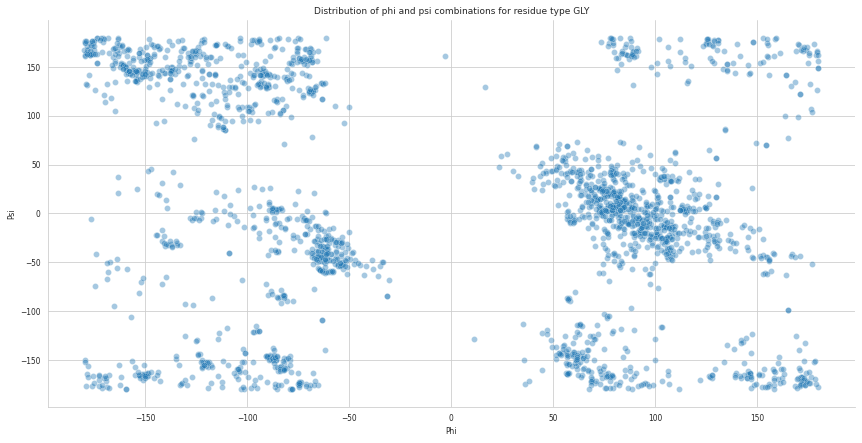

In [ ]:
# Plotting the scatterplot without hue and size as it would make the chart non-readable
g = sns.relplot(
    data=df_GLY, 
    x='phi', 
    y='psi',  
    alpha=0.4,
    height=6, 
    aspect=2).set( 
        title="Distribution of phi and psi combinations for residue type GLY")

# Giving labels to the axis
g.set_xlabels("Phi")
g.set_ylabels("Psi")

The GLY amino acid lies in almost all the XY plane. We can expect a similar number of clusters as the mixed residue type model.

The following blocks will now compute the different metrics and the model will then be computed and plotted.

In [ ]:
# Initializing iterations
iter_ = 0

# Printing head row
print("ITER| INFO%s |  DIST    CLUS    NOISE" % (" "*39))
print("-"*75)

# Looping through eps and min_samples
for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        # Increasing counter iteration
        iter_ += 1
        
        # Computing metrics
        noise_metric, cluster_metric, noise_count = get_metrics(eps, min_samples, df_GLY_scaled[['phi','psi']], iter_)
        
        # Inserting results in the dataframes
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_noise_count.loc[eps, min_samples] = noise_count

ITER| INFO                                        |  DIST    CLUS    NOISE
---------------------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.148   17        107
  2 | Tested with eps = 0.1 and min_samples =  15 | 0.092   17        314
  3 | Tested with eps = 0.1 and min_samples =  25 | 0.063   12        715
  4 | Tested with eps = 0.1 and min_samples =  35 | 0.053    8       1067
  5 | Tested with eps = 0.1 and min_samples =  45 | 0.047    5       1349
  6 | Tested with eps = 0.1 and min_samples =  55 | 0.044    3       1535
  7 | Tested with eps = 0.1 and min_samples =  65 | 0.043    2       1646
  8 | Tested with eps = 0.1 and min_samples =  75 | 0.043    2       1695
  9 | Tested with eps = 0.1 and min_samples =  85 |  0.04    1       1921
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.272    6         14
 11 | Tested with eps = 0.2 and min_samples =  15 | 0.151    6         56
 12 | Tested with eps = 0.2 and min

We can get a look at the hyperparameters through a heatmap.

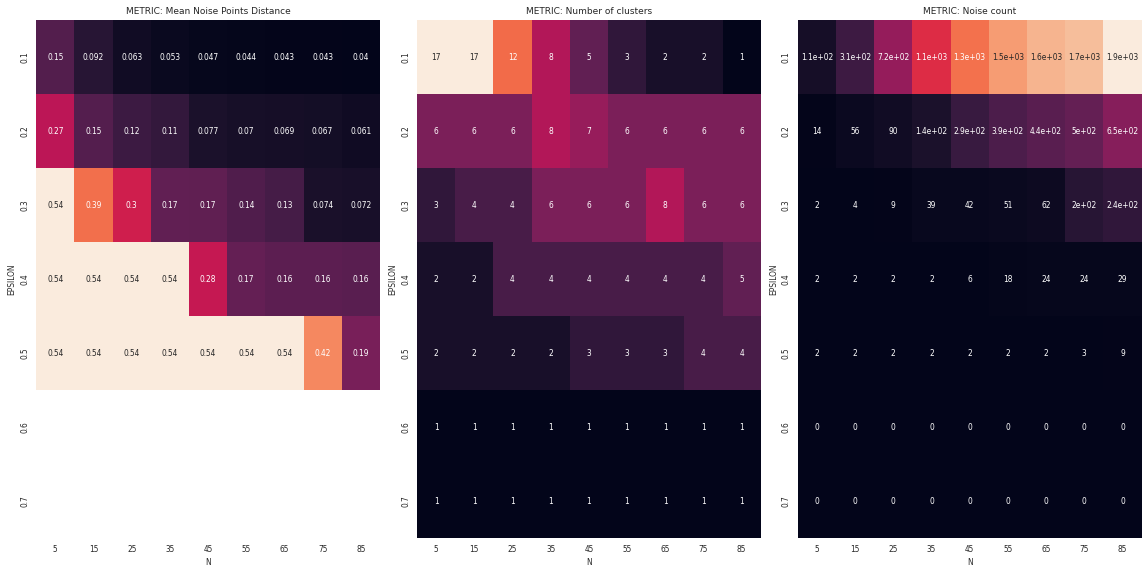

In [ ]:
# Creating figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8) )

# Plotting the 3 subplots
sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")
sns.heatmap(results_noise_count, annot = True, ax = ax3, cbar = False).set_title("METRIC: Noise count")

# Labeling subplots
ax1.set_xlabel("N"); ax2.set_xlabel("N"), ax3.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON"), ax3.set_ylabel("EPSILON")

# Plotting everything
plt.tight_layout(); plt.show()

For this case, 4 or 6 clusters have robust combinations between **eps=0.3-0.4** and **minPts=35-55**. Knowing from the previous study, there is plenty of combinations with almost no outliers whereas the *GLY* amino acid was the most outlying one. 

The values of **eps=0.4** and **minPts=40** were chosen. We can now do the clustering and then plot it.

In [ ]:
# Istantiating with eps = 0.4 and min_samples = 40 
eps_GLY = 0.4
min_samples_GLY = 40
dbscan_model_GLY = DBSCAN( eps = eps_GLY, min_samples = min_samples_GLY)

# Fitting
dbscan_model_GLY.fit(df_GLY_scaled[['phi','psi']])

# Extracting labels
df_GLY["LABEL"] = dbscan_model_GLY.labels_
core_samples_mask_GLY = np.zeros_like(dbscan_model_GLY.labels_, dtype=bool)
core_samples_mask_GLY[dbscan_model_GLY.core_sample_indices_] = True

# Counting the outliers
n_clusters_GLY = len(df_GLY['LABEL'].unique())-1
n_outliers_GLY = df_GLY[df_GLY['LABEL']<0]['LABEL'].sum()*-1
print('The number of clusters is:', n_clusters_GLY)
print('The total number of outliers is:', n_outliers_GLY)

The number of clusters is: 4
The total number of outliers is: 6


Plotting the clustering done on the *GLY* only next to the one with all the mixed residue, but showing only the *GLY* datapoints.

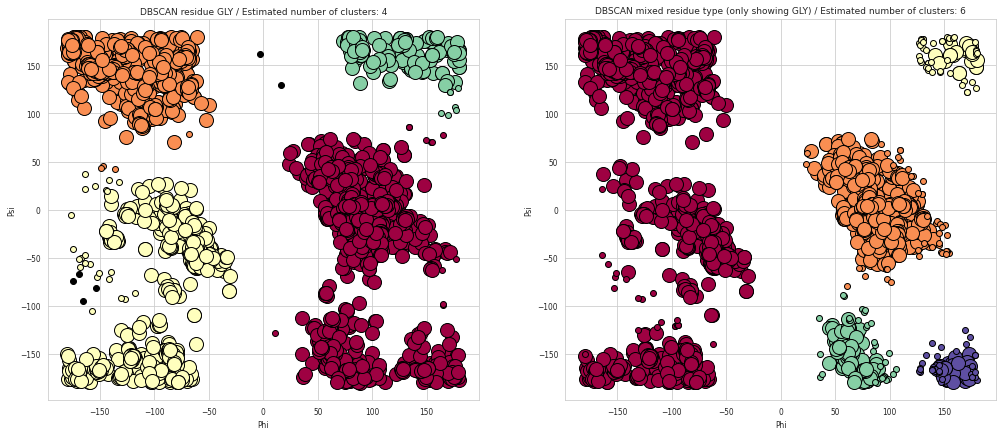

In [ ]:
# Plot results & compare to the original clustering
plt.figure(figsize=(17,7))

# Black removed and is used for noise instead.
unique_labels_GLY = set(df_GLY["LABEL"])
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_GLY))]

# Create figure
plt.subplot(121)
# Looping though k and colors
for k, col in zip(unique_labels_GLY, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (df_GLY["LABEL"] == k)
    xy = X_GLY[class_member_mask & core_samples_mask_GLY]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_GLY[class_member_mask & ~core_samples_mask_GLY]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('DBSCAN residue GLY / Estimated number of clusters: %d' % n_clusters_GLY)
plt.xlabel('Phi')
plt.ylabel('Psi')

plt.subplot(122)
# Looping though k and colors
for k, col in zip(unique_labels_best, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (df_scaled["LABEL"] == k) & (df_scaled["residue name"]=='GLY')
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Choosing title and plotting
plt.title('DBSCAN mixed residue type (only showing GLY) / Estimated number of clusters: %d' % n_clusters_best)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

The same conclusion can be drawn from the previous study, as what is mainly differing is the number of clusters and the noise. 4 clusters are found in this study, while the mixed residue type had 6 and 5 of it were containing GLY amino acids.

When only the GLY amino acid are treated, less clusters are computed by the algorithm. The noise is also lower, especially when GLY amino acid was the most outlying one.
This study shows how differently the clustering behaves with the different interactions between all the data points. The interactions with other data points are lost, but still might offer other takeaways.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c28f18f-5601-41c6-bc0a-653400681d77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>